# Create oceanic boundary condition for regional MITgcm based on SODA3.12.2

In [1]:
import numpy as np
import xarray as xr
import xmitgcm as xm
import os
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('===== develop init cond based on SODA 3.12.2')
vars = ['temp', 'salt']
vars1 = ['TEMP', 'SALT']
srcdir = './'
mon = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
caseroot = './'

===== develop init cond based on SODA 3.12.2


In [3]:
# define new grid
runcase = 'NorthPacific.lonlat2x2.42lev'
rname = 'NorthPacific'
xrange = [131, 249]  # zonal extent
yrange = [5, 62]  # meridional extent
n = [60, 40]   # number of grid points

In [4]:
#define a new grid coordinates
xn = np.linspace(xrange[0], xrange[1], n[0])
yn = np.linspace(yrange[0], yrange[1], n[1])
zn=np.array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float) * -1
#
# print the values of x0 and y0
x0 = xn[0]-(xn[1]-xn[0])/2.
y0 = yn[0]-(yn[1]-yn[0])/2.
print('x0='+str(x0))
print('y0='+str(y0))
#
# print the number of grid points in x, y and z
print('Nx='+str(xn.size))
print('Ny='+str(yn.size))
print('Nz='+str(zn.size))

x0=130.0
y0=4.269230769230769
Nx=60
Ny=40
Nz=42


In [5]:
yr=[1990]
vref = [8, 34]
dx = np.diff(xn)
dy = np.diff(yn)
yrI = yr[0]
yrE = yr[-1]
Nt = len(yr) * 12
# initialize array
N=n
tmpT = np.zeros((zn.size, N[0], N[1]))
tmpS = np.zeros((zn.size, N[0], N[1]))

Working on ./soda3.12.2_mn_ocean_reg_1990.nc


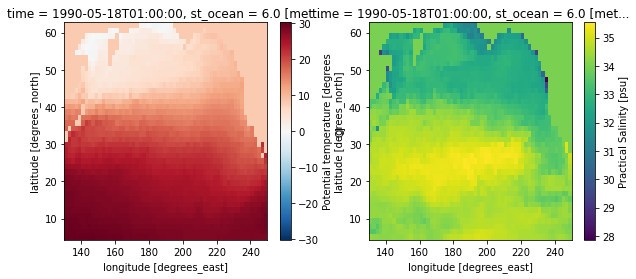

In [6]:
fn = f'{srcdir}soda3.12.2_mn_ocean_reg_{yr[0]}.nc'
print(f'Working on {fn}')
znp=zn*(-1)
znp[0] = 6
#
wn = 'Tini_'+rname+'.bin'
dst = xr.open_dataset(fn)[vars[0]].isel(time=4).interp(xt_ocean=xn,yt_ocean=yn,st_ocean=znp).fillna(vref[0])
tdata=dst.to_numpy()
xm.utils.write_to_binary(tdata.flatten(), wn)
#
wn = 'Sini_'+rname+'.bin'
dss = xr.open_dataset(fn)[vars[1]].isel(time=4).interp(xt_ocean=xn,yt_ocean=yn,st_ocean=znp).fillna(vref[1])
sdata=dss.to_numpy()
xm.utils.write_to_binary(sdata.flatten(), wn)
#
fig=plt.figure(figsize=(10,4))
ax=fig.subplots(1,2)
dst.isel(st_ocean=0).plot(ax=ax[0])
dss.isel(st_ocean=0).plot(ax=ax[1])
plt.savefig('initcond.png',bbox_to_inches='tight')